In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


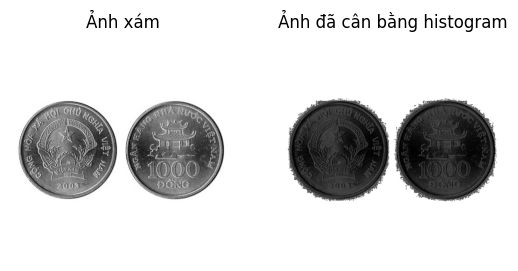

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# bài 1
def preprocess_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gray)
    return img_gray, img_eq
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/xu.jpg")
img_gray, img_eq = preprocess_image(img)

plt.subplot(1, 2, 1)
plt.title('Ảnh xám')
plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Ảnh đã cân bằng histogram')
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.show()




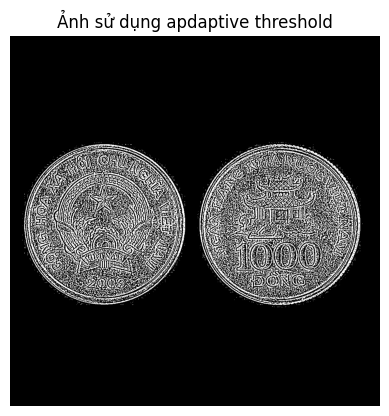

In [10]:
# bài 4

def adaptive_threshold(img_gray):
  binary_img = cv2.adaptiveThreshold(
  img_gray, 255,
  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11, 2
  )
  return binary_img

a_threshold= adaptive_threshold(img_gray)

plt.imshow(a_threshold, cmap='gray')
plt.title('Ảnh sử dụng apdaptive threshold')
plt.axis('off')
plt.show()



bài 4:

khả năng tách nền của adaptive dựa trên vùng nhỏ của ảnh , tách nền vô cùng tốt

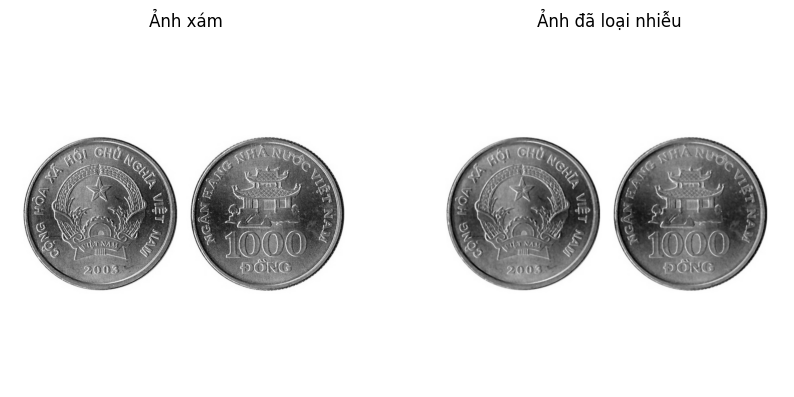

In [14]:
# bài 2

def denoise_median(img_gray, ksize=5):
    denoised_img = cv2.medianBlur(img_gray, ksize)
    return denoised_img

DN_img= denoise_median(img_gray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ảnh xám')
plt.axis('off')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(DN_img, cmap='gray')
plt.title('Ảnh đã loại nhiễu')
plt.axis('off')
plt.show()

bài 2:

ảnh loại bỏ nhiễu cho ảnh nét mờ hơn so với ảnh gốc , loại bỏ nhiễu ở vùng trung tâm

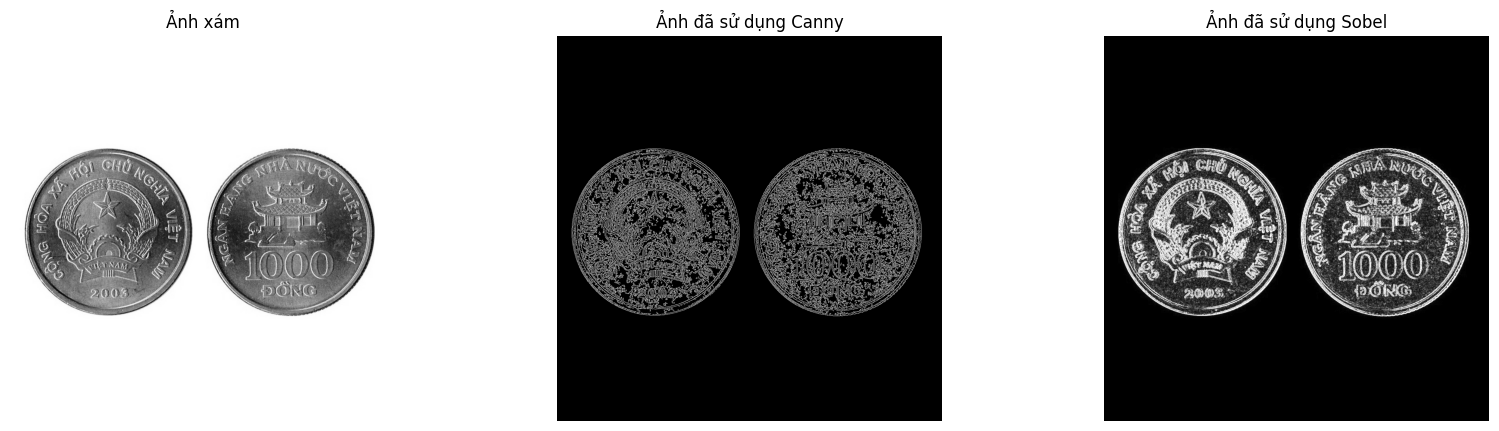

In [16]:
# bài 3

def canny_edges(img_gray, t1=50, t2=150):
    canny_img = cv2.Canny(img_gray, t1, t2)
    return canny_img

Canny= canny_edges(img_gray)

def sobel(img):
  img_sobelx=cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
  img_sobely=cv2.Sobel(img,cv2.CV_32F,0,1,ksize=3)
  img_sobel=cv2.magnitude(img_sobelx,img_sobely)
  img_sobel=cv2.convertScaleAbs(img_sobel)
  return img_sobel

Sobel=sobel(img_gray)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Ảnh xám')
plt.axis('off')
plt.imshow(img_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Ảnh đã sử dụng Canny')
plt.axis('off')
plt.imshow(Canny, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Ảnh đã sử dụng Sobel')
plt.axis('off')
plt.imshow(Sobel, cmap='gray')

plt.show()

bài 3:

so với canny thì sobel cho ra ảnh rõ , nét hơi thô , có nhiều chi tiết nhỏ hơn là canny , các chi tiết chồng lên nhau với rất nhiều nét

ngưỡng t la : 177.0


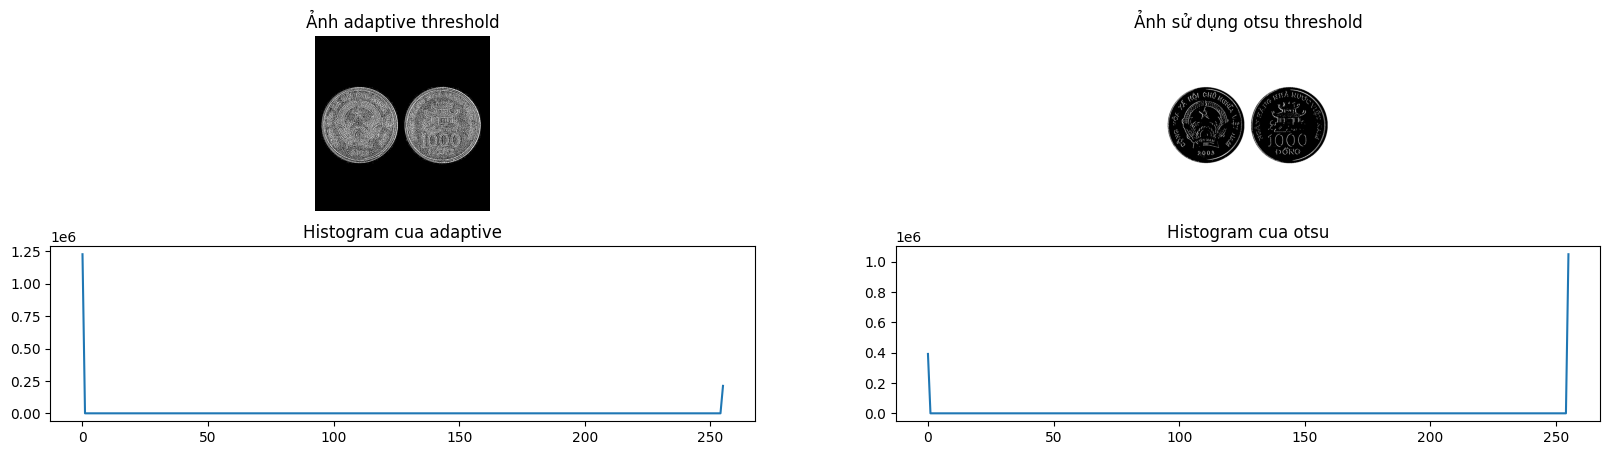

In [55]:
# bài 5
def otsu_threshold(img_gray):
    # t,otsu_img = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # return t,otsu_img

    _, otsu_img = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_img, _
# t,ostu = otsu_threshold(img_gray)

otsu,_ = otsu_threshold(img_gray)

hist = cv2.calcHist([otsu], [0], None, [256], [0,256]).ravel()
hist_adapt= cv2.calcHist([a_threshold], [0], None, [256], [0,256]).ravel()

print("ngưỡng t la :",t)

plt.figure(figsize=(20, 5))
plt.subplot(2, 2, 1)
plt.title('Ảnh adaptive threshold')
plt.axis('off')
plt.imshow(a_threshold, cmap='gray')

plt.subplot(2,2, 2)
plt.title('Ảnh sử dụng otsu threshold')
plt.axis('off')
plt.imshow(otsu, cmap='gray')

# plt.subplot(1, 3, 3 )
# plt.title('Ảnh đã sử dụng adaptive threshold')
# plt.axis('off')
# plt.imshow(otsu_hist, cmap='gray')
plt.subplot(2,2,3)
plt.title('Histogram cua adaptive')
plt.plot(hist_adapt);

plt.subplot(2,2,4)
plt.title('Histogram cua otsu')
plt.plot(hist);


plt.show()


bài 5:

histogram của ảnh otsu và adaptive chỉ có 2 ngưỡng là 0 và 255 (trắng đen ),cho thấy ảnh tách ngưỡng rất tốt với ảnh có nhiều vùng , nhưng lại hướng ngược lại với nhau

In [67]:
# bài 6
def remove_small_regions(binary_img, min_size=100):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_img)
    fil_img = np.zeros_like(binary_img)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            fil_img[labels == i] = 255
    return fil_img,labels

fil_img,lbl = remove_small_regions(otsu,min_size=100)

print("so vùng sau khi lọc",lbl)





so vùng sau khi lọc [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


Số lượng contour: 2


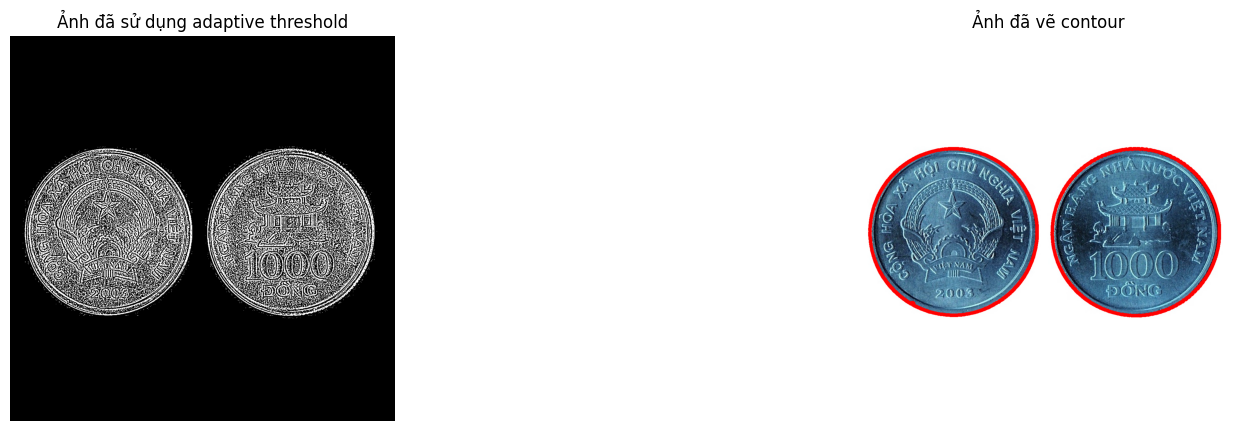

In [68]:
# bài 7
_, binary2_img = cv2.threshold(img_gray,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
def find_and_draw_contours(binary_img, img):
    contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    out= img.copy()
    out_img=cv2.drawContours(out, contours, -1, (255,0,0), 9)
    return out_img, len(contours)

contoured_img, num_contour = find_and_draw_contours(binary2_img, img)

print("Số lượng contour:", num_contour)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.title('Ảnh đã sử dụng adaptive threshold')
plt.axis('off')
plt.imshow(a_threshold, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(contoured_img)
plt.title('Ảnh đã vẽ contour')
plt.axis('off')
plt.show()

In [69]:

# bài 8
import csv
def export_object_stats(binary_img, output_csv="objects.csv"):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img)

    areas = []
    with open(output_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["ID", "Area", "CX", "CY"])
        for i in range(1, num_labels):
            area = int(stats[i, cv2.CC_STAT_AREA])
            cx, cy = centroids[i]
            areas.append(area)
            writer.writerow([i, area, round(cx, 2), round(cy, 2)])

    num_objects = num_labels - 1
    avg_area = np.mean(areas) if areas else 0

    print(f"Số đối tượng: {num_objects}")
    print(f"Diện tích trung bình: {avg_area:.2f}")
    print(f"Đã lưu kết quả vào file: {output_csv}")

    return num_objects, avg_area
num_objects, avg_area = export_object_stats(fil_img)
output_file="objects.csv"
with open(output_file, 'r') as f:
        print(f"--- NỘI DUNG FILE: {output_file} ---")
        content = f.read()
        # In nội dung ra màn hình
        print(content)

Số đối tượng: 67
Diện tích trung bình: 15430.97
Đã lưu kết quả vào file: objects.csv
--- NỘI DUNG FILE: objects.csv ---
ID,Area,CX,CY
1,1015085,602.28,594.72
2,2544,449.34,611.11
3,266,750.06,390.27
4,2955,1034.63,597.47
5,127,850.13,395.93
6,146,292.24,400.82
7,121,321.95,401.42
8,102,895.52,402.98
9,202,220.66,410.13
10,124,251.0,406.27
11,133,355.39,411.29
12,105,807.89,407.67
13,103,932.29,413.15
14,112,394.39,423.76
15,102,770.82,423.58
16,120,190.12,432.87
17,760,645.24,525.81
18,105,727.63,447.84
19,133,423.27,448.8
20,1395,186.49,598.72
21,141,151.26,469.01
22,415,414.84,513.8
23,168,837.55,469.88
24,539,362.77,506.16
25,367,813.75,503.81
26,119,466.11,490.58
27,112,296.11,502.54
28,366,201.79,538.58
29,182,969.2,533.95
30,262,276.12,537.7
31,175,766.81,542.05
32,104,107.16,541.07
33,163,433.37,561.42
34,114,312.72,554.6
35,102,499.16,551.85
36,120,92.02,566.72
37,147,400.93,577.44
38,242,787.9,581.92
39,101,936.08,574.11
40,108,839.34,576.53
41,186,900.04,582.5
42,146,220.32,6

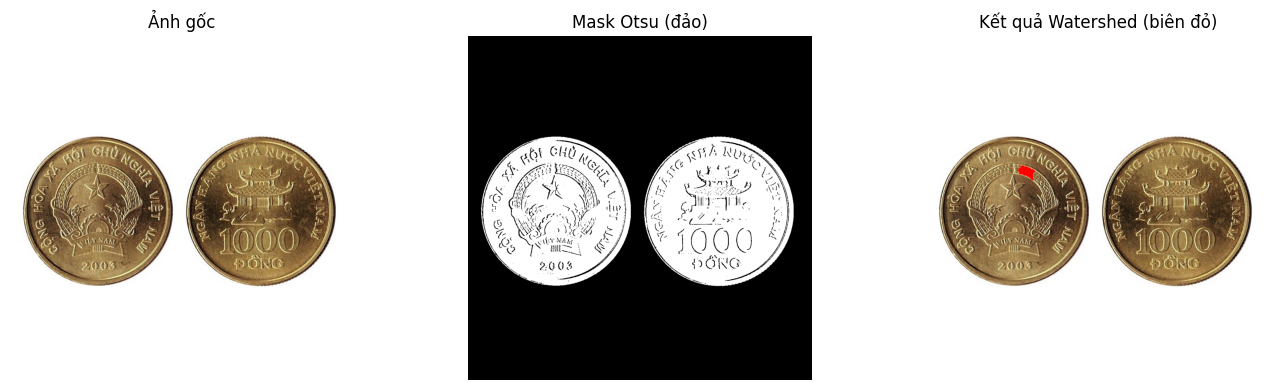

In [51]:
# bài 9
def watershed_segment(img_color):
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 4)
    sure_fg = np.uint8(sure_fg)


    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    segmented_img = img_color.copy()
    cv2.watershed(segmented_img, markers)
    segmented_img[markers == 4] = [0, 0,255]

    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(thresh, cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title("Kết quả Watershed (biên đỏ)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return segmented_img
segmented_img = watershed_segment(img)

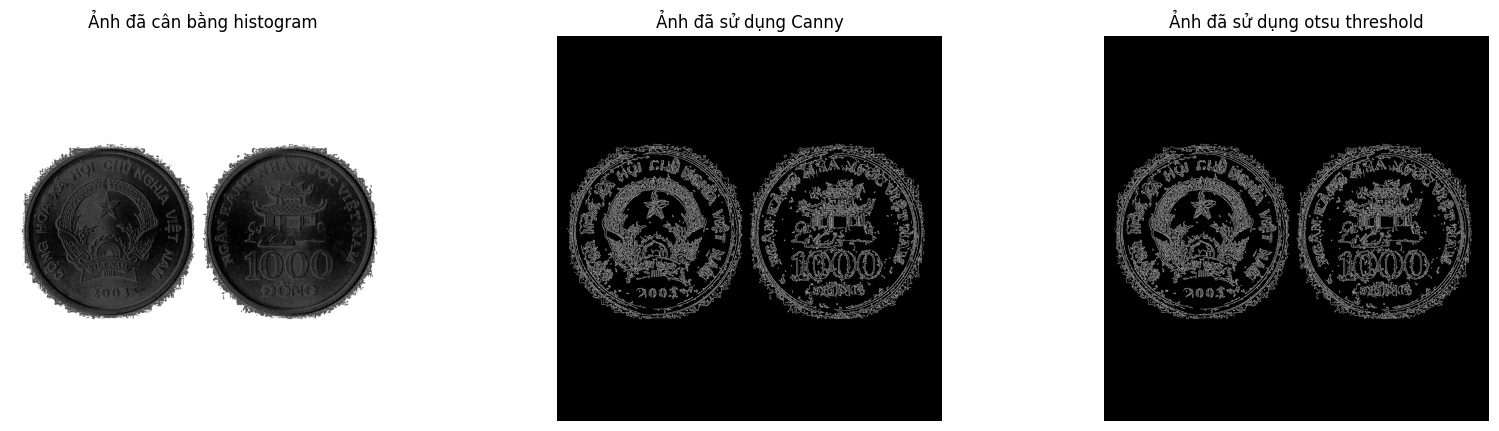

In [62]:
# bài 10

def auto_pipeline(img_):
    eq_img = cv2.equalizeHist(img_gray)

    edges = cv2.Canny(eq_img, 50, 150)

    _, otsu_mask = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return eq_img, edges, otsu_mask

img_e, edges, otsu_mask = auto_pipeline(img_gray)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Ảnh đã cân bằng histogram')
plt.axis('off')
plt.imshow(img_e, cmap='gray')

plt.subplot(1,3,2)
plt.title('Ảnh đã sử dụng Canny')
plt.axis('off')
plt.imshow(edges, cmap='gray')

plt.subplot(1,3,3)
plt.title('Ảnh đã sử dụng otsu threshold')
plt.axis('off')
plt.imshow(otsu_mask, cmap='gray')

plt.show()